<a href="https://colab.research.google.com/github/skwolvie/AI-Index-Contribution/blob/main/question_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pycaret[full]
# !pip install pyyaml==5.4.1

In [1]:
import pandas as pd
import numpy as np
import os
# os.chdir('../updated_skoolbeep_data/')
# os.listdir()

df= pd.read_csv('/content/drive/MyDrive/qr/engineered_action_history_pos.csv', low_memory=False)
print(df.shape)
df= df[df['action_type']!='lesson']
df.reset_index(inplace=True, drop=True)
df['date']=pd.to_datetime(df['date'])
df['created_at']=pd.to_datetime(df['created_at'])
df['month']= df.date.dt.month
df['month'].value_counts().sort_index()
df.shape

(144960, 58)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

(134131, 59)

In [2]:
df= df[['action_type', 'created_at', 'date', 'month', 'student_id', 'question_id', 'belongs_to_active_user',
    'topic_id', 'question_type_id', 'knowledge_type_ids','complexity', 
    'result_rolling_avg_user_topic_recent','result_rolling_avg_user_questype_recent','result_rolling_avg_user_knowledge_recent',
    'noofq_user_topic','noofq_user_questype','noofq_user_knowledge',
    'result']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134131 entries, 0 to 134130
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   action_type                               134131 non-null  object        
 1   created_at                                134131 non-null  datetime64[ns]
 2   date                                      134131 non-null  datetime64[ns]
 3   month                                     134131 non-null  int64         
 4   student_id                                134131 non-null  float64       
 5   question_id                               134131 non-null  float64       
 6   belongs_to_active_user                    134131 non-null  bool          
 7   topic_id                                  134131 non-null  int64         
 8   question_type_id                          134131 non-null  float64       
 9   knowledge_type_

In [3]:
train= df[df['month']<=10]
test= df[df['month']==11]
train.drop(columns=['date', 'month'], axis=1, inplace=True)
test.drop(columns=['date', 'month'], axis=1, inplace=True)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
print(train.shape)
print(test.shape)

(124805, 16)
(9326, 16)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X= train[['topic_id', 'question_type_id',
       'knowledge_type_ids', 'complexity',
       'result_rolling_avg_user_topic_recent',
       'result_rolling_avg_user_questype_recent',
       'result_rolling_avg_user_knowledge_recent', 'noofq_user_topic',
       'noofq_user_questype', 'noofq_user_knowledge']]
X.dropna(inplace=True)
vif = pd.DataFrame()
vif['Features'] = X.columns


vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Features,VIF
6,result_rolling_avg_user_knowledge_recent,14.50
5,result_rolling_avg_user_questype_recent,12.61
4,result_rolling_avg_user_topic_recent,9.93
2,knowledge_type_ids,8.22
1,question_type_id,4.94
0,topic_id,4.89
3,complexity,3.48
9,noofq_user_knowledge,3.23
8,noofq_user_questype,3.21
7,noofq_user_topic,1.52


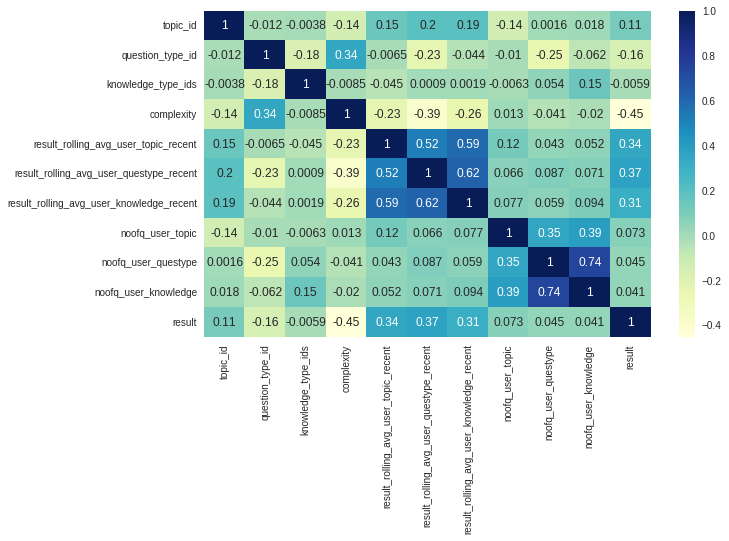

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

import seaborn as sns
dataplot = sns.heatmap(train[['topic_id', 'question_type_id',
       'knowledge_type_ids', 'complexity',
       'result_rolling_avg_user_topic_recent',
       'result_rolling_avg_user_questype_recent',
       'result_rolling_avg_user_knowledge_recent', 'noofq_user_topic',
       'noofq_user_questype', 'noofq_user_knowledge', 'result']].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [5]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
clf = setup(data=train, target = 'result', experiment_name='clf', test_data=test, 
            ignore_features=['action_type', 'created_at', 'student_id', 'question_id','belongs_to_active_user'],
           categorical_features=['question_type_id', 'knowledge_type_ids'], use_gpu=True)

,Description,Value
0,session_id,6576
1,Target,result
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(124805, 16)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7887,0.8330,0.9096,0.8065,0.8543,0.4734,0.4881,11.176
lightgbm,Light Gradient Boosting Machine,0.7853,0.8280,0.9049,0.8055,0.8516,0.4664,0.4805,1.357
gbc,Gradient Boosting Classifier,0.7849,0.8290,0.9043,0.8054,0.8513,0.4657,0.4794,16.898
ada,Ada Boost Classifier,0.7807,0.8217,0.9021,0.8025,0.8485,0.4546,0.4690,4.438
xgboost,Extreme Gradient Boosting,0.7780,0.8143,0.8960,0.8027,0.8461,0.4509,0.4633,1.201
lr,Logistic Regression,0.7763,0.8126,0.9092,0.7942,0.8470,0.4364,0.4546,9.278
lda,Linear Discriminant Analysis,0.7755,0.8125,0.9112,0.7923,0.8468,0.4327,0.4519,0.493
ridge,Ridge Classifier,0.7749,0.0000,0.9174,0.7886,0.8474,0.4263,0.4485,0.166
rf,Random Forest Classifier,0.7707,0.7988,0.8842,0.8015,0.8399,0.4373,0.4474,18.579
et,Extra Trees Classifier,0.7613,0.7809,0.8765,0.7958,0.8332,0.4151,0.4248,19.085


In [9]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7890,0.8565,0.8250,0.8598,0.8421,0.5245,0.5255
1,0.7877,0.8327,0.9232,0.7974,0.8557,0.4621,0.4802
2,0.7906,0.8345,0.9394,0.7921,0.8595,0.4598,0.4865
3,0.7878,0.8209,0.9347,0.7917,0.8573,0.4544,0.4790
4,0.7995,0.8471,0.9139,0.8147,0.8614,0.5034,0.5144
5,0.7919,0.8339,0.9213,0.8027,0.8579,0.4761,0.4922
6,0.7949,0.8295,0.9122,0.8107,0.8585,0.4907,0.5021
7,0.7829,0.8267,0.9166,0.7960,0.8520,0.4522,0.4684
8,0.7702,0.8052,0.8952,0.7940,0.8416,0.4287,0.4390
9,0.7583,0.7927,0.8679,0.7961,0.8304,0.4126,0.4173


In [10]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7901,0.8588,0.8303,0.8573,0.8436,0.5247,0.5253
1,0.7915,0.8361,0.9254,0.8002,0.8582,0.4722,0.4904
2,0.7881,0.8323,0.9388,0.7900,0.8580,0.4525,0.4797
3,0.7903,0.8231,0.9373,0.7929,0.8591,0.4605,0.4859
4,0.7967,0.8464,0.9146,0.8113,0.8599,0.4948,0.5067
5,0.7944,0.8361,0.9221,0.8048,0.8595,0.4830,0.4988
6,0.8040,0.8453,0.9121,0.8205,0.8639,0.5174,0.5268
7,0.7859,0.8329,0.9214,0.7965,0.8544,0.4579,0.4756
8,0.7733,0.8065,0.9040,0.7927,0.8447,0.4319,0.4449
9,0.7645,0.8013,0.8859,0.7930,0.8369,0.4182,0.4266


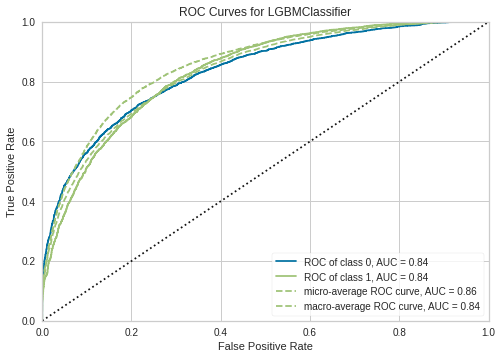

In [12]:
plot_model(tuned_lightgbm)

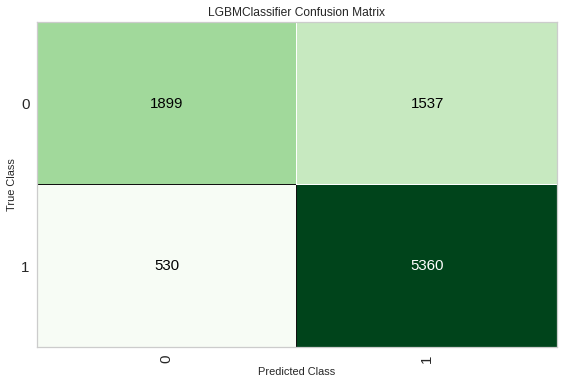

In [13]:
plot_model(lightgbm, plot = 'confusion_matrix')

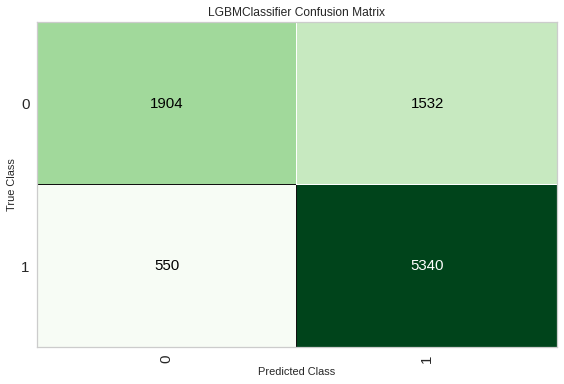

In [14]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

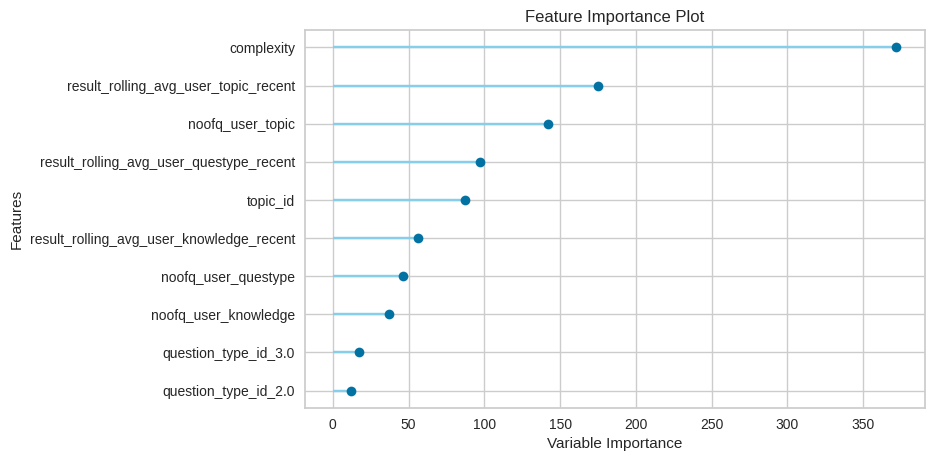

In [15]:
plot_model(tuned_lightgbm, plot = 'feature')

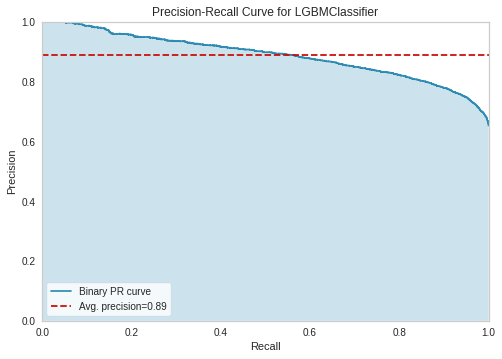

In [16]:
plot_model(tuned_lightgbm, plot = 'pr')

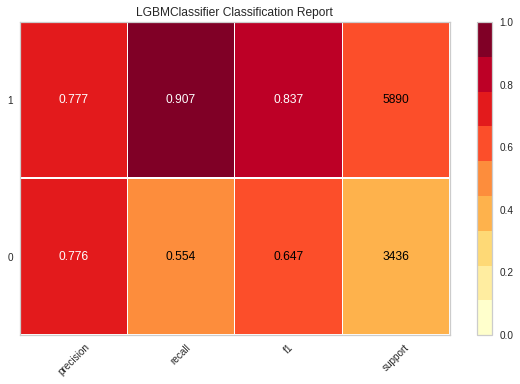

In [22]:
plot_model(tuned_lightgbm, plot = 'class_report')

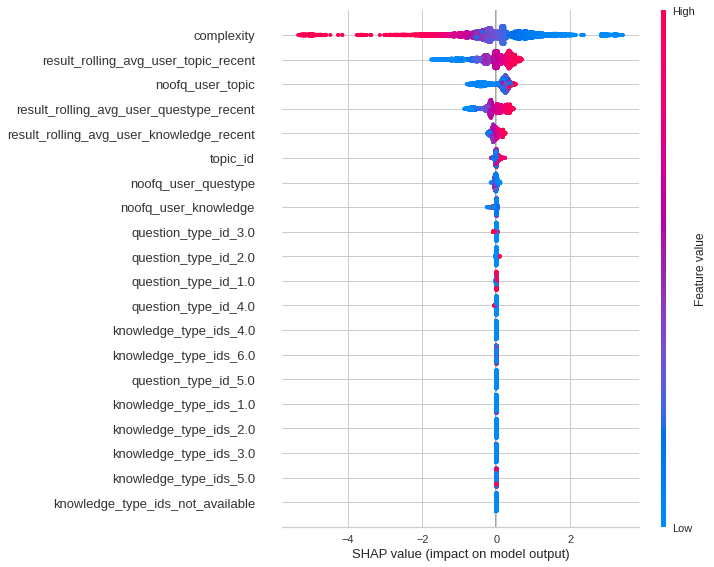

In [18]:
interpret_model(tuned_lightgbm)

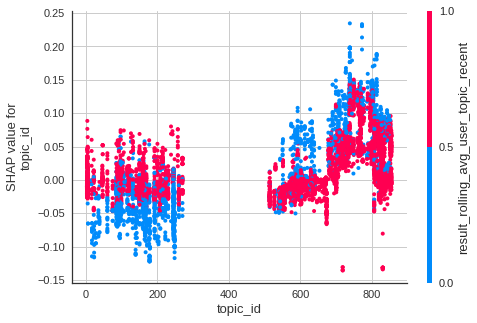

In [19]:
interpret_model(tuned_lightgbm, plot = 'correlation')

In [20]:
save_model(tuned_lightgbm, model_name='/content/drive/MyDrive/best-pos-pred-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['question_type_id',
                                                             'knowledge_type_ids'],
                                       display_types=True,
                                       features_todrop=['action_type',
                                                        'created_at',
                                                        'student_id',
                                                        'question_id',
                                                        'belongs_to_active_user'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='result',
                                       time_features=[])),
                 ('imputer',
                  Si...
                                 colsample_bytr

In [23]:
loaded_bestmodel = load_model('/content/drive/MyDrive/qr/best-pos-pred-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['question_type_id',
                                                            'knowledge_type_ids'],
                                      display_types=True,
                                      features_todrop=['action_type',
                                                       'created_at',
                                                       'student_id',
                                                       'question_id',
                                                       'belongs_to_active_user'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='result',
                                      time_features=[])),
                ('imputer',
                 Si...
         

In [24]:
test['pred']= loaded_bestmodel.predict(test)

In [25]:
probs=loaded_bestmodel.predict_proba(test)
probs= [i[1] for i in probs]
test['pred_proba']= probs

In [26]:
test['result'].value_counts()

1.0    5890
0.0    3436
Name: result, dtype: int64

In [27]:
test['pred'].value_counts()

1    6872
0    2454
Name: pred, dtype: int64

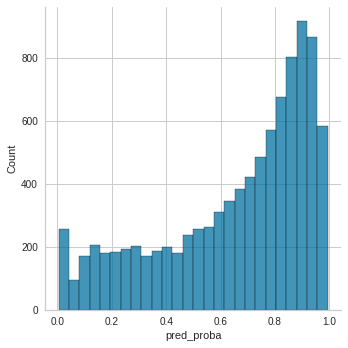

In [32]:
sns.displot(test, x="pred_proba")

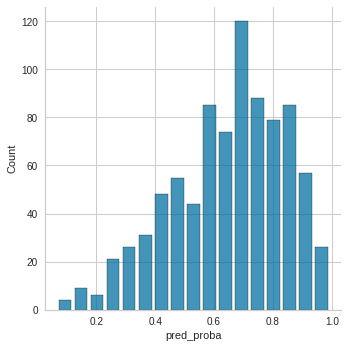

In [33]:
a= test.groupby(['student_id', 'topic_id'])['pred_proba'].aggregate('mean').reset_index()
sns.displot(a, x="pred_proba", shrink=.8)

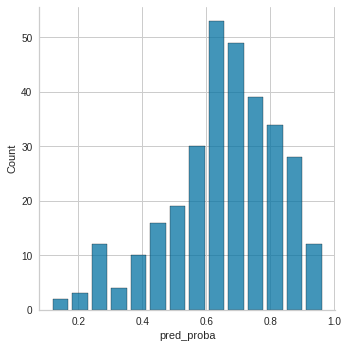

In [34]:
a= test.groupby(['student_id'])['pred_proba'].aggregate('mean').reset_index()
sns.displot(a, x="pred_proba", shrink=.8)

In [35]:
test.head()

,action_type,created_at,student_id,question_id,belongs_to_active_user,topic_id,question_type_id,knowledge_type_ids,complexity,result_rolling_avg_user_topic_recent,result_rolling_avg_user_questype_recent,result_rolling_avg_user_knowledge_recent,noofq_user_topic,noofq_user_questype,noofq_user_knowledge,result,pred,pred_proba
0,quiz,2021-11-01 07:23:27,110123.0,5691.0,True,164,1.0,3.0,0.120370,1.000000,0.95,1.00,10.0,74.0,18.0,1.0,1,0.958022
1,quiz,2021-11-01 07:23:43,110123.0,5692.0,True,164,1.0,3.0,0.076190,1.000000,0.95,1.00,11.0,75.0,19.0,1.0,1,0.970994
2,quiz,2021-11-01 07:23:59,110123.0,5693.0,True,164,1.0,3.0,0.107843,1.000000,0.95,1.00,12.0,76.0,20.0,1.0,1,0.965276
3,quiz,2021-11-01 07:24:08,110123.0,5694.0,True,164,2.0,3.0,0.144231,1.000000,1.00,1.00,13.0,44.0,21.0,0.0,1,0.959151
4,quiz,2021-11-01 07:24:25,110123.0,5695.0,True,164,4.0,3.0,0.114286,0.928571,0.50,0.95,14.0,4.0,22.0,1.0,1,0.919199


In [36]:
train.sort_values(by=['created_at'], ascending=False, inplace=True, ignore_index=True)
train

,action_type,created_at,student_id,question_id,belongs_to_active_user,topic_id,question_type_id,knowledge_type_ids,complexity,result_rolling_avg_user_topic_recent,result_rolling_avg_user_questype_recent,result_rolling_avg_user_knowledge_recent,noofq_user_topic,noofq_user_questype,noofq_user_knowledge,result
0,quiz,2021-10-31 22:49:40,110885.0,7248.0,True,646,1.0,1.0,0.720000,0.444444,0.650000,0.700000,9.0,71.0,31.0,1.0
1,quiz,2021-10-31 22:49:30,110885.0,7247.0,True,646,4.0,1.0,1.000000,0.500000,0.600000,0.700000,8.0,21.0,30.0,0.0
2,quiz,2021-10-31 22:49:13,110885.0,7246.0,True,646,3.0,6.0,0.750000,0.571429,0.600000,0.650000,7.0,51.0,29.0,0.0
3,quiz,2021-10-31 22:48:57,110885.0,7245.0,True,646,2.0,6.0,0.000000,0.500000,0.800000,0.650000,6.0,66.0,28.0,1.0
4,quiz,2021-10-31 22:48:47,110885.0,7244.0,True,646,1.0,6.0,0.041667,0.400000,0.650000,0.600000,5.0,70.0,27.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124800,exam,2021-06-17 08:47:36,4362.0,305.0,False,117,1.0,4.0,0.857143,0.833333,0.800000,0.666667,6.0,5.0,3.0,0.0
124801,exam,2021-06-17 08:47:36,4362.0,306.0,False,117,1.0,4.0,0.750000,0.714286,0.666667,0.500000,7.0,6.0,4.0,0.0
124802,exam,2021-06-17 08:47:36,4362.0,307.0,False,117,1.0,4.0,0.888889,0.625000,0.571429,0.400000,8.0,7.0,5.0,0.0
124803,exam,2021-06-17 08:47:36,4362.0,309.0,False,117,1.0,6.0,0.666667,0.555556,0.500000,1.000000,9.0,8.0,1.0,1.0


# Create practice Q DB

In [47]:
ques= pd.read_csv('/content/drive/MyDrive/qr/questions.csv')
ques= ques[['id', 'question_type_id', 'knowledge_type_ids', 'subject_id']]
ques.columns=['question_id', 'question_type_id', 'knowledge_type_ids', 'subject_id']
ques.head
print(ques.shape)

(10946, 4)


In [48]:
practices= pd.read_csv('/content/drive/MyDrive/qr/practices.csv')
practices= practices[['id', 'chapter_id']]
practices.columns=['practice_id', 'chapter_id']
practices.drop_duplicates(inplace=True)
practices.reset_index(inplace=True, drop=True)
practices

,practice_id,chapter_id
0,1,269
1,2,269
2,3,269
3,4,257
4,5,257
...,...,...
2117,2125,75
2118,2126,112
2119,2127,171
2120,2128,99


In [49]:
practice_questions= pd.read_csv('/content/drive/MyDrive/qr/practice_questions.csv')
practice_questions= practice_questions[['practice_id', 'question_id']]
practice_questions.drop_duplicates(inplace=True)
practice_questions.reset_index(inplace=True, drop=True)
practice_questions

,practice_id,question_id
0,1,12
1,1,25
2,1,24
3,1,15
4,1,13
...,...,...
19300,2129,1816
19301,2129,1805
19302,2129,1813
19303,2129,1827


In [50]:
p= pd.merge(practices, practice_questions, left_on=['practice_id'], right_on=['practice_id'], how='inner')
p= pd.merge(p, ques, left_on=['question_id'], right_on=['question_id'], how='inner')
p.drop_duplicates(subset=['question_id'], inplace=True)
p=p[['question_id', 'question_type_id', 'knowledge_type_ids','chapter_id', 'subject_id']]
p.columns=['question_id', 'question_type_id', 'knowledge_type_ids','topic_id', 'subject_id']
p

,question_id,question_type_id,knowledge_type_ids,topic_id,subject_id
0,12,1,6.0,269,10
19,25,2,6.0,269,10
37,24,2,6.0,269,10
54,15,1,5.0,269,10
68,13,1,5.0,269,10
...,...,...,...,...,...
19300,3684,1,4.0,180,1
19301,3705,2,4.0,180,1
19302,1392,1,6.0,75,4
19303,1397,2,5.0,75,4


In [51]:
p= pd.merge(p, df[['question_id', 'complexity']], left_on='question_id', right_on='question_id', how='left', validate='1:m')
p.drop_duplicates(inplace=True)
p['complexity'].fillna(0.2, inplace=True)
p

,question_id,question_type_id,knowledge_type_ids,topic_id,subject_id,complexity
0,12,1,6.0,269,10,0.857143
7,25,2,6.0,269,10,0.200000
10,24,2,6.0,269,10,0.714286
17,15,1,5.0,269,10,0.200000
20,13,1,5.0,269,10,0.529412
...,...,...,...,...,...,...
20162,3684,1,4.0,180,1,0.200000
20163,3705,2,4.0,180,1,0.200000
20164,1392,1,6.0,75,4,0.200000
20166,1397,2,5.0,75,4,0.200000


In [59]:
p['topic_id'].value_counts()

33     36
269    31
234    30
133    30
76     30
       ..
243     9
255     9
143     9
268     5
254     3
Name: topic_id, Length: 175, dtype: int64

# Function to create an ordered recommendation of questions for practice

In [57]:
def recommender(student_df, practice_df, student_id, topic_id, difficulty_setting):
    student_df= student_df[student_df['student_id']==student_id]
    student_df.reset_index(inplace=True, drop=True)
    if len(student_df)==0:
        print('new user: recommend questions based on ordered complexity of questions based on difficulty setting')
        pass
    else:
        print(len(student_df))
        topic_ra= student_df[student_df['student_id']==student_id]
        topic_ra.drop_duplicates(subset=['topic_id'], keep='first', inplace=True)
        topic_ra= topic_ra[['student_id', 'topic_id', 'result_rolling_avg_user_topic_recent', 'noofq_user_topic']]
        if len(topic_ra)==0:
            print('user is fresh to topic, fill topic rolling avg to 0.65')
            topic_ra.loc[-1] = [student_id, topic_id, 0.65, 0]
            topic_ra.index = topic_ra.index + 1
            topic_ra = topic_ra.sort_index()
        for i in range(0,1): #qtype_ra range
            pass
        for i in range(0,2): #ktype_ra range
            pass
        # return_df=pd.concat(topic_ra, qtype_ra, ktype_ra)
    return
recommender(train,p, 4362.0, 291.0, 10)

10


In [58]:
recommender(train,p, 1.0, 291.0, 10)

new user: recommend questions based on ordered complexity of questions based on difficulty setting
